# **Turnout, Ticket Splitting, and Partisan Correlation in the 2020 Election**


Hannah Lo, Henry Spinella, Kelsey Olesen


# <span style="color:blue"> Introduction </span> 

The 2020 election was deeply polarizing for many communities in the United States. To investigate these political divides, we explored two research questions: How may voter turnout differ between split-party and main-party counties? To what extent do votes for the governor election predict those for the president? Exploring these questions allows us to consider how political diversity within a county may impact civic engagement.

We began by examining voter turnout in relation to gubernatorial and presidential election results at the county level. We categorized counties into two main types: Split-party and same-party. Split-party counties voted for governors and presidential candidates of differing political parties, while same-party counties voted for governors and presidential candidates of the same. We concluded that split-party counties tend to have smaller voter turnout in comparison to same-party counties. 

We then examined the extent to which counties vote similarly for governor and president when controlling for party. Based on our data analysis, we concluded that counties tend to vote in the same party for governor and president, but the relationship is only moderate.

# <span style="color:blue"> Dataset Table Description </span> 

In our analysis, we used two datasets from the "US_Election_2020" folder: the dataset on county-level governor races (governors_county_candidate.csv) and the dataset on the county-level presidential race (president_county_candidate.csv). We used a for loop to get the summary of both of datasets. For both datasets, each row corresponds to a single candidate on the ballot within that county. The governor dataset had 5,145 rows and 6 columns, including the respective state, county, candidate, party, votes, and a won column representing whether the candidate won the county (True if they had won). The presidential dataset had 32,177 rows and 6 columns, with state, county, candidate, party, total_votes, and won. 

In [2]:
#importing libraries and data, examining data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

gov_df = pd.read_csv("data/governors_county_candidate.csv")
pres_df = pd.read_csv("data/president_county_candidate.csv")

dfs = {
    "governor": gov_df,
    "president": pres_df
}

for name, df in dfs.items():
    nrows, ncols = df.shape

    print(f"# of rows in {name} dataset:", nrows)
    print("# of columns:", ncols)
    print(df.columns.values)
    print(df.dtypes)
    print("______________________________________________________________________")

# of rows in governor dataset: 5145
# of columns: 6
['state' 'county' 'candidate' 'party' 'votes' 'won']
state        object
county       object
candidate    object
party        object
votes         int64
won            bool
dtype: object
______________________________________________________________________
# of rows in president dataset: 32177
# of columns: 6
['state' 'county' 'candidate' 'party' 'total_votes' 'won']
state          object
county         object
candidate      object
party          object
total_votes     int64
won              bool
dtype: object
______________________________________________________________________


# <span style="color:blue"> Cleaning Data </span> 



<font size = "4">

In this code snippet we wanted to remove any unnecessary data in the dataframes, and rename one of the dataframe's columns to match for overall understandability. We removed any rows/tuples where the respective voter never wrote in a candidate even though they supposedly (according to the data) selected Write-In on their ballots. We removed these ballots from the data because they can be treated as blank ballots, and as such cannot help us understand any differences between each county's results, when considering differences between governor and presidential winners.

The column 'total_votes' in the "clean_pres_df" was renamed to votes for ease of understanding. 'total_votes' in this dataframe is equivalent to 'votes' in the governor dataframe and we wanted the data to reflect this.

In [3]:

clean_gov_df = gov_df.query("candidate != ' Write-ins' | votes != 0")
clean_pres_df = pres_df.query("candidate != ' Write-ins' | total_votes != 0").copy() #python threw an error  during renaming when i didn't make this an explicit copy

#also renaming clean_pres column total_votes into votes for ease of understanding

clean_pres_df.rename(columns={'total_votes' : 'votes'}, inplace=True)
clean_pres_df.columns



Index(['state', 'county', 'candidate', 'party', 'votes', 'won'], dtype='object')

# <span style="color:blue"> Merging and Aggregating pt.1 </span>  

In order to compare county-level election outcomes for governor and presidential races, we first extracted the winning candidate for each county in both datasets. We then merged these two datasets on the shared columns 'state' and 'county' to align the winners from each election, using the suffixes 'gov' and 'pres' to differentiate between the datasets. After this merge, we created a new boolean column 'party_eq' which represented whether the winning governor and presidential candidate for the county were from the same political party.

In [4]:

#Merged data for first grapgh: Turnout Distribution: Same-Party vs Split-Party Counties
gov_by_county = clean_gov_df.groupby(['state', 'county'], as_index=False)['votes'].sum()
pres_by_county = clean_pres_df.groupby(['state', 'county'], as_index=False)['votes'].sum() #grouping the data makes state and county indexes unless we use as_index = false

gov_winners = clean_gov_df[clean_gov_df['won']].copy()
pres_winners = clean_pres_df[clean_pres_df['won']].copy()

merged_data = gov_winners.merge(
    pres_winners,
    on=['state', 'county'],
    suffixes=('_gov', '_pres')
)

total_votes_pres = clean_pres_df.groupby(['state', 'county'], as_index=False)['votes'].sum()
total_votes_pres = total_votes_pres.rename(columns={'votes': 'total_votes_pres'})

# Merge total votes into merged_data so we can compare both winning canidate votes and total votes
# we will use this as voter turnout proxy but it could have been done with gov votes  
merged_data = merged_data.merge(total_votes_pres, on=['state', 'county'])
merged_data['party_eq'] = merged_data['party_gov'] == merged_data['party_pres']





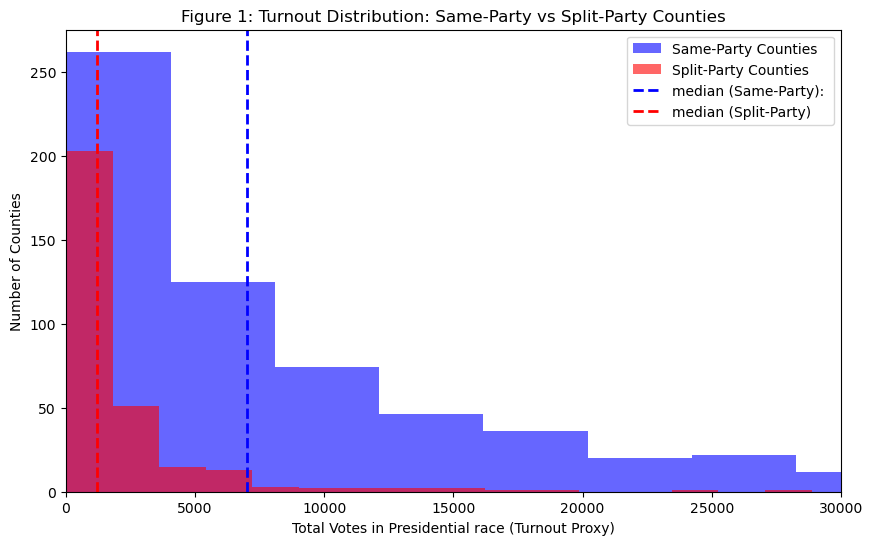

In [ ]:


# Split the merged data of winners: counties that voted the same or differently 
# in the presidential and governor races.
split = merged_data[merged_data['party_eq'] == False]
same  = merged_data[merged_data['party_eq'] == True]


#Calculate median number of votes for winning canidate in same and split counties
same_median  = same['total_votes_pres'].median()
split_median = split['total_votes_pres'].median()
#total_votes_pres serves as a surigate for turnout because it assumed that coutires that have higher votes 
# in the overal presidencial race have a higher turnout across both pres and gov elections. 

#Plot histograms for voter count for split and same party counties together
plt.figure(figsize=(10, 6))

#SAME
plt.hist(
    same['total_votes_pres'],
    bins=300,
    alpha=0.6,
    label='Same-Party Counties',
    color='blue'
)

#SPLIT
plt.hist(
    split['total_votes_pres'],
    bins=300,
    alpha=0.6,
    label='Split-Party Counties',
    color='red'
)

#Line represents median voters for same party voting counties
plt.axvline(same_median,  color='blue', linestyle='--', linewidth=2,
            label=f"median (Same-Party): ")


#Line represents median voters for same split voting counties
plt.axvline(split_median, color='red',  linestyle='--', linewidth=2,
            label=f"median (Split-Party)")

plt.xlabel("Total Votes in Presidential race (Turnout Proxy)")
plt.ylabel("Number of Counties")
plt.title("Figure 1: Turnout Distribution: Same-Party vs Split-Party Counties")
# Only visualizing votes up to 30,000 for simplicity.
# Some counties are far beyond 30,000; however, these counties are still accounted for in the median.
plt.xlim(0, 30000)
plt.legend()
plt.show()

# <span style="color:blue"> Figure 1: Results </span>  

In this section of our analysis, we addressed the research question of how voter turnout may differ between split-party and main-party counties. Based on figure 1, we observe that split-party counties appear to have smaller voter turn out in camparison to same-party counties, given the samller medians. This could be due to the fact that politically dissonant communities may also experience less civic engagement, or that these communities have fewer voters to begin with. We can also observe that fewer counties are split-party in comparison to same-party counties. This may mean that split-party counties are less common than same-party counties.  

# <span style="color:blue"> Merging and Aggregating pt.2 </span>  

We created a new merged DataFrame to include four columns: total presidential votes, total gubernatorial votes, total Republican presidential votes, and total Republican gubernatorial votes. Merging the data in this way allowed us to easily create additional columns that calculate the percentage of votes that went to Republican candidates in both races; we did the same for the Democratic candidates. This approach ensures that all relevant vote totals are in one place, making it straightforward to analyze party support and compare patterns between the presidential and gubernatorial elections at the county level, controlling for party. 

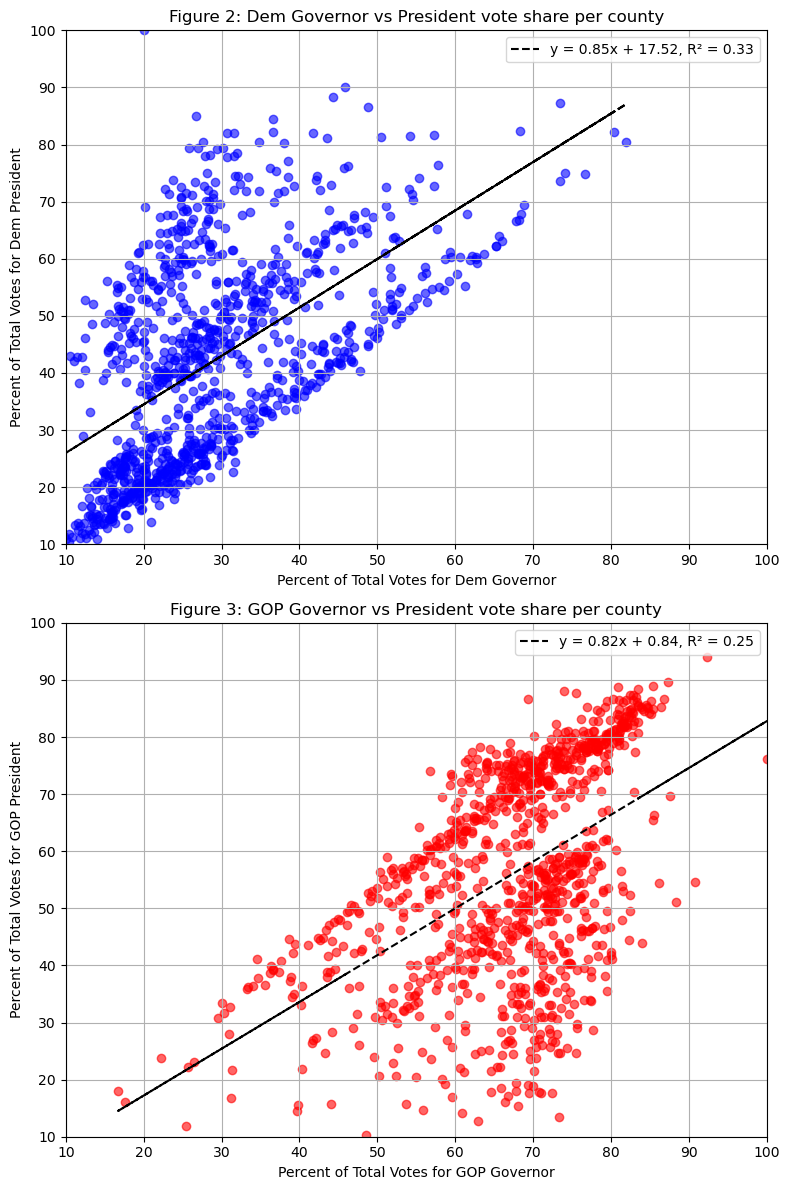

In [7]:
import matplotlib.pyplot as plt  

# Sum Democratic votes per county
# group by state and county because many counties share the same name across different states. 
gov_D_votes = clean_gov_df[clean_gov_df['party'] == 'DEM'].groupby(['state','county'], as_index=False)['votes'].sum()
pres_D_votes = clean_pres_df[clean_pres_df['party'] == 'DEM'].groupby(['state','county'], as_index=False)['votes'].sum()
# Sum Republican votes per county
# group by state and county because many counties share the same name across different states. 
gov_R_votes = clean_gov_df[clean_gov_df['party'] == 'REP'].groupby(['state','county'], as_index=False)['votes'].sum()
pres_R_votes = clean_pres_df[clean_pres_df['party'] == 'REP'].groupby(['state','county'], as_index=False)['votes'].sum()

# Total governor + total president votes per county
gov_totals = gov_by_county.rename(columns={'votes': 'gov_total_votes'})
pres_totals = pres_by_county.rename(columns={'votes': 'pres_total_votes'})

def add_vote_shares(df, prefix):
    """
    Adds Democratic and Republican vote share columns for governor or president.
    
    prefix: 'gov' or 'pres'
    """
    df[f'{prefix}_D_share'] = df[f'{prefix}_D_votes'] / df[f'{prefix}_total_votes']
    df[f'{prefix}_R_share'] = df[f'{prefix}_R_votes'] / df[f'{prefix}_total_votes']
    return df


# Merge all into one dataframe
merged_votes = (
    gov_totals
    .merge(gov_D_votes.rename(columns={'votes': 'gov_D_votes'}), on=['state','county'], how='left')
    .merge(gov_R_votes.rename(columns={'votes': 'gov_R_votes'}), on=['state','county'], how='left')
    .merge(pres_totals, on=['state','county'], how='left')
    .merge(pres_D_votes.rename(columns={'votes': 'pres_D_votes'}), on=['state','county'], how='left')
    .merge(pres_R_votes.rename(columns={'votes': 'pres_R_votes'}), on=['state','county'], how='left')
)

# Add vote share columns using the function
merged_votes = add_vote_shares(merged_votes, 'gov')
merged_votes = add_vote_shares(merged_votes, 'pres')



# Side-by-side scatter plots for Democratic and Republican vote shares
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# DEMOCRAT Scatter plot: each point = one county
x = merged_votes['gov_D_share'] * 100
y = merged_votes['pres_D_share'] * 100

axes[0].scatter(
    x,
    y,
    alpha=0.6,
    color='blue'
)

# Fit linear regression
slope, intercept = np.polyfit(x, y, 1)
line_y = slope * x + intercept

# R^2
r_value = np.corrcoef(x, y)[0, 1]
r_squared = r_value**2

# Regression line
axes[0].plot(
    x,
    line_y,
    color='black',
    linestyle='--',
    label=f'y = {slope:.2f}x + {intercept:.2f}, R² = {r_squared:.2f}'
)

# Axis limits
axes[0].set_xlim(10, 100)
axes[0].set_ylim(10, 100)

axes[0].set_xlabel("Percent of Total Votes for Dem Governor")
axes[0].set_ylabel("Percent of Total Votes for Dem President")
axes[0].set_title("Figure 2: Dem Governor vs President vote share per county")
axes[0].grid(True)
axes[0].legend()

# REPUBLICAN Scatter plot: each point = one county
x = merged_votes['gov_R_share'] * 100
y = merged_votes['pres_R_share'] * 100

axes[1].scatter(
    x,
    y,
    alpha=0.6,
    color='red'
)

# Fit linear regression
slope, intercept = np.polyfit(x, y, 1)
line_y = slope * x + intercept

# R^2
r_value = np.corrcoef(x, y)[0, 1]
r_squared = r_value**2

axes[1].plot(
    x,
    line_y,
    color='black',
    linestyle='--',
    label=f'y = {slope:.2f}x + {intercept:.2f}, R² = {r_squared:.2f}'
)

axes[1].set_xlim(10, 100)
axes[1].set_ylim(10, 100)

axes[1].set_xlabel("Percent of Total Votes for GOP Governor")
axes[1].set_ylabel("Percent of Total Votes for GOP President")
axes[1].set_title("Figure 3: GOP Governor vs President vote share per county")

axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


# <span style="color:blue"> Figures 2 & 3: Results </span>  

In this section of our analysis, we saught address the research question of how strongly is the governor’s winning vote share correlated with the president’s winning vote share, in each county. Given our graphs, we observe a positive relationship, where as percent of total votes of governor increases, the percent of total votes for president also increases. This relationship is true for both political parties. 

# <span style="color:blue"> Description of Merged Data </span>  

The merged dataset has relatively similar results for the 'votes_gov' and 'votes_pres' columns. These were our main columns of analysis and it is expected for them to have essentially equivalent means because both columns represent the total number of votes for the winning candidate in each county, and each county has the same overall population. The maxima of each column being such large outliers is due to the governor dataset not including many high-population counties, because not all states were holding gubernatorial elections in 2020.

In [8]:
desc_stats = merged_votes[['gov_total_votes', 'gov_R_votes', 'pres_total_votes', 'pres_R_votes']].describe()

# Display the descriptive statistics
display(desc_stats)

,gov_total_votes,gov_R_votes,pres_total_votes,pres_R_votes
count,1.025000e+03,1025.000000,1.025000e+03,1025.000000
mean,1.992216e+04,10437.711220,2.009558e+04,10205.553171
std,6.505975e+04,25767.930968,6.559663e+04,24576.412354
min,5.000000e+00,4.000000,5.000000e+00,0.000000
25%,1.089000e+03,739.000000,1.109000e+03,468.000000
50%,3.778000e+03,2623.000000,3.844000e+03,2199.000000
75%,1.323000e+04,8487.000000,1.341400e+04,8725.000000
max,1.198049e+06,307022.000000,1.210507e+06,269167.000000


<span style="color: blue; font-size: 32px;">2020 U.S. Election Results Discussion</span>


From the 2020 U.S. election results in figure 1, we observe that the **median voter turnout is lower in split-ticket counties**, where voters elected governors and presidents from different parties. However, this pattern is **heavily skewed by a few high-turnout, same-party counties**, which raise the overall average. A likely explanation for this difference is that many same-party counties are larger and more urban, resulting in higher total vote counts, while split-party counties tend to be smaller. A limitation of our study is that we are unable to compare total population given each county with voter turn out. Because of this, we are unable to draw causal conclusion about the relationship between voter turnout and political alignment in counties. 

Based on our figure 2 and 3, we observe  the **slopes of 0.82 and 0.85**, implying that as votes for Governor increases, the votes for President increase as well, regardless of party. These slopes suggest that the Presidential vote share is a slightly better predictor of the gubernatorial vote share than vice versa. Interestingly, The high y-intercept of 17.52 in the Democratic graph indicates that even in counties where the Democratic gubernatorial candidate receives minimal support, the Democratic presidential candidate still receives a notable baseline level of votes, in contrast to the much lower Republican y-intercept of 0.84. Additionally, our analysis shows a **R² value of only 0.25**, which suggests that about a quarter of presidential voting patterns can be predicted from gubernatorial voting patterns. When comparing the relationship with the Democratic votes, our analysis shows a **R² value of only 0.33**, which suggests that about a third of Democratic presidential voting patterns can be predicted by gubernatorial voting patterns. The remaining variation may come from local factors, candidate differences, or ticket splitting. This means that this relationship, regardless of party, is relatively weak and other factors likely influence voting patterns across counties. Thus, we conclude that while counties tend to vote similarly across the two offices, but the Presidential candidate party may not be a strong predictor of the Governer candidate party.
